<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/llibre-estil/logo-UOC-masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">TFM - UEBA: Detección de Anomalías</p>
<p style="margin: 0; text-align:right;">20231 - Máster universitario en Ciencias de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Alejandro Ortega de los Ríos
</div>

# Extracción de características - Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_df = pd.read_csv('../data/file.csv')
features = pd.read_csv('features.csv')

In [3]:
file_df.head()

,id,date,user,pc,filename,content
0,{L9G8-J9QE34VM-2834VDPB},01/02/2010 07:23:14,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...
1,{H0W6-L4FG38XG-9897XTEN},01/02/2010 07:26:19,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters 25 landed strait dis...
2,{M3Z0-O2KK89OX-5716MBIM},01/02/2010 08:12:03,HPH0075,PC-2417,D3D3WC9W.doc,D0-CF-11-E0-A1-B1-1A-E1 union 24 declined impo...
3,{E1I4-S4QS61TG-3652YHKR},01/02/2010 08:17:00,HPH0075,PC-2417,QCSW62YS.doc,D0-CF-11-E0-A1-B1-1A-E1 becoming period begin ...
4,{D4R7-E7JL45UX-0067XALT},01/02/2010 08:24:57,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8


In [4]:
insiders_list = features[features['insider'] == 1]['user'].tolist()

In [5]:
users = file_df['user'].unique().tolist()
len(users) #No todos los usuarios han copiado ficheros

264

In [6]:
file_insiders_list = [insider for insider in users if insider in insiders_list]
print(len(file_insiders_list))

69


## 1. Número de ficheros copiados al día

C:\Users\alexo\AppData\Local\Temp\ipykernel_23400\845368199.py:26: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  axes[0].hist(working_days_files[working_day_insiders], edgecolor='black', color='green', alpha=0.7, density=True, label='Insider')
C:\Users\alexo\AppData\Local\Temp\ipykernel_23400\845368199.py:34: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  axes[1].hist(weekend_files[weekend_insiders], edgecolor='black', color='green', alpha=0.7, density=True, label='Insider')


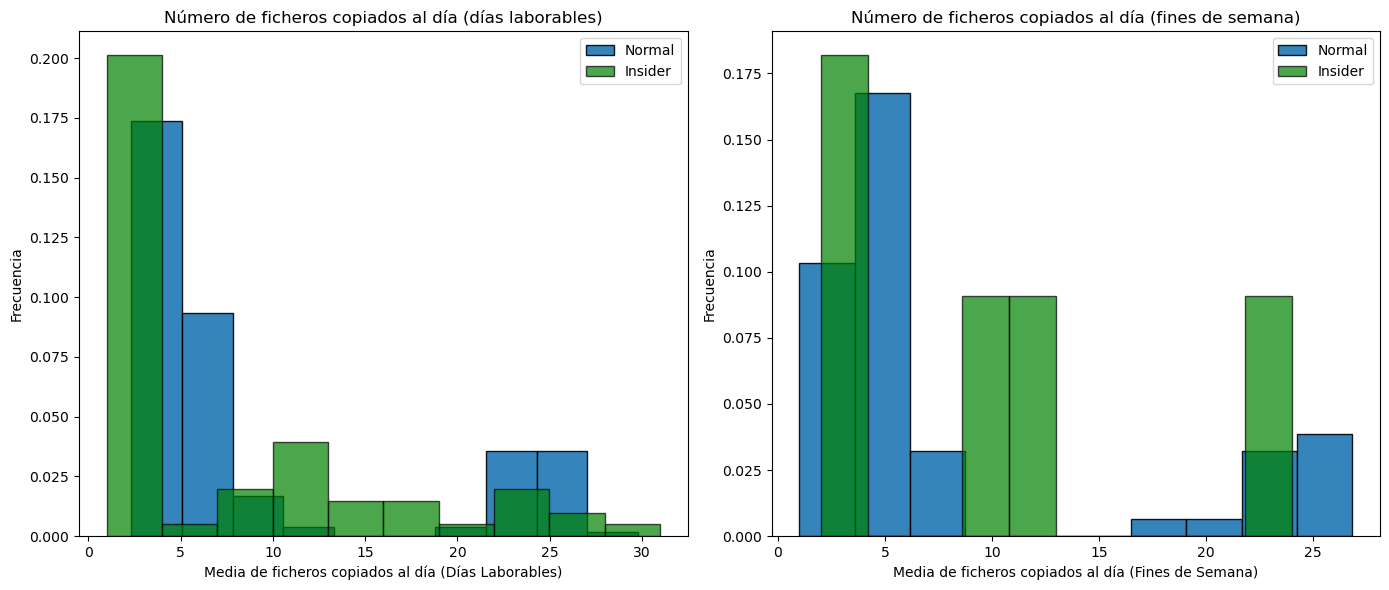

In [7]:
#Ficheros diarios. Obtengo la hora y la fecha
file_df['date'] = pd.to_datetime(file_df['date'], format='%m/%d/%Y %H:%M:%S')
file_df['time'] = file_df['date'].dt.strftime('%H:%M:%S')
file_df['date'] = file_df['date'].dt.floor('d')

#Obtengo el día de la semana (0: lunes, 1: martes, ..., 6: domingo)
file_df['weekday'] = pd.to_datetime(file_df['date']).dt.weekday

# Filtro solo los días laborables
working_days_files = file_df[(file_df['weekday'] != 5) & (file_df['weekday'] != 6)]
weekend_files = file_df[(file_df['weekday'] == 5) | (file_df['weekday'] == 6)]

#Lista de insiders que copian ficheros en laborables y festivos
weekend_insiders = set(weekend_files['user'].unique().tolist()) & set(file_insiders_list)
working_day_insiders = set(working_days_files['user'].unique().tolist()) & set(file_insiders_list)

#Número de ficheros copiados por día durante los fines de semana y laborables por usuario
working_days_files = working_days_files.groupby(['user', 'date']).size().groupby('user').mean()
weekend_files = weekend_files.groupby(['user', 'date']).size().groupby('user').mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histograma para días laborables
axes[0].hist(working_days_files[~working_days_files.index.isin(working_day_insiders)], edgecolor='black', alpha=0.9, density=True, label='Normal')
axes[0].hist(working_days_files[working_day_insiders], edgecolor='black', color='green', alpha=0.7, density=True, label='Insider')
axes[0].set_xlabel('Media de ficheros copiados al día (Días Laborables)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Número de ficheros copiados al día (días laborables)')
axes[0].legend()

# Histograma para fines de semana
axes[1].hist(weekend_files[~weekend_files.index.isin(weekend_insiders)], edgecolor='black', alpha=0.9, density=True, label='Normal')
axes[1].hist(weekend_files[weekend_insiders], edgecolor='black', color='green', alpha=0.7, density=True, label='Insider')
axes[1].set_xlabel('Media de ficheros copiados al día (Fines de Semana)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Número de ficheros copiados al día (fines de semana)')
axes[1].legend()

plt.tight_layout()
plt.show()

In [25]:
# Tipo de archivo de la columna 'filename'
file_df['file_type'] = file_df['filename'].str.split('.').str[-1]

# Cuento el número de archivos de cada tipo para cada usuario al día
files_per_user_per_day = file_df.groupby(['user', 'date', 'file_type']).size().unstack(fill_value=0)

daily_files_mean = files_per_user_per_day.groupby('user').mean().reset_index()

daily_files_mean.head()

file_type,user,doc,exe,jpg,pdf,txt,zip
0,AAF0535,2.035714,0.026786,0.205357,0.607143,0.205357,0.107143
1,AAM0658,5.666667,0.000000,0.333333,2.000000,2.000000,0.333333
2,ABC0174,2.016043,0.016043,0.128342,0.614973,0.181818,0.192513
3,AHD0848,2.065574,0.032787,0.163934,0.590164,0.229508,0.180328
4,AHM0410,5.552941,0.027451,0.419608,1.729412,0.407843,0.482353


In [28]:
#Añado los usuarios que faltan y les asigno valor cero
total_users = features['user'].unique().tolist()
file_users = daily_files_mean['user'].unique().tolist()
missing_users = set(total_users) - set(file_users)

missing_users_data = pd.DataFrame({'user': list(missing_users)})
missing_users_data = missing_users_data.assign(**{file_type: 0 for file_type in daily_files_mean.columns[1:]})

#Combino el DataFrame de usuarios faltantes con el DataFrame daily_files_mean
daily_files_mean = pd.concat([daily_files_mean, missing_users_data]).fillna(0).reset_index(drop=True)

print("Number of users: ", len(daily_files_mean['user']))

Number of users:  1000


In [29]:
daily_files_mean.head()

,user,doc,exe,jpg,pdf,txt,zip
0,AAF0535,2.035714,0.026786,0.205357,0.607143,0.205357,0.107143
1,AAM0658,5.666667,0.000000,0.333333,2.000000,2.000000,0.333333
2,ABC0174,2.016043,0.016043,0.128342,0.614973,0.181818,0.192513
3,AHD0848,2.065574,0.032787,0.163934,0.590164,0.229508,0.180328
4,AHM0410,5.552941,0.027451,0.419608,1.729412,0.407843,0.482353


## 2. Espacio de Características

In [17]:
#Diccionario a partir de weekend_files
weekend_files_dict = weekend_files.to_dict()
working_days_files_dict = working_days_files.to_dict()

# Asigno los valores correspondientes si el usuario existe en weekend_files, y cero en caso contrario
features['weekend_files'] = features['user'].map(weekend_files_dict).fillna(0).astype(int)
features['working_day_files'] = features['user'].map(working_days_files_dict).fillna(0).astype(int)

In [31]:
#Combino features con daily_files
combined_df = features.merge(daily_files_mean, on='user', how='left')
combined_df.drop(columns=['Unnamed: 0'], inplace=True)

,Unnamed: 0,user,email_size,attachments,recipients,working_day_emails,address_count,weekend_emails,insider,working_day_files,weekend_files,doc,exe,jpg,pdf,txt,zip
0,0,LAP0338,30020.394184,0.377839,1.638930,13.655072,2,2,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,1,MOH0273,30397.402083,0.758333,1.670833,2.962963,2,8,0,23,22,14.877805,0.117207,1.167082,4.683292,1.189526,1.17207
2,2,HVB0037,29958.497676,0.000000,1.658367,8.705202,3,13,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,3,NWK0215,29828.181548,0.431548,1.651786,1.000000,2,12,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,4,LRR0148,29895.532625,0.930197,1.587253,2.941964,2,13,0,3,3,2.273438,0.011719,0.218750,0.671875,0.179688,0.18750


In [37]:
#Exporto fichero de características
combined_df.to_csv('features.csv')